In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.HeartDisease.describe()

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [5]:
np.unique(df.HeartDisease)

array([0, 1])

In [6]:
# remove te outliers using z-score
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df = df[df["RestingBP"] > 0]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
np.unique(df.RestingECG)

array(['LVH', 'Normal', 'ST'], dtype=object)

<Axes: xlabel='HeartDisease'>

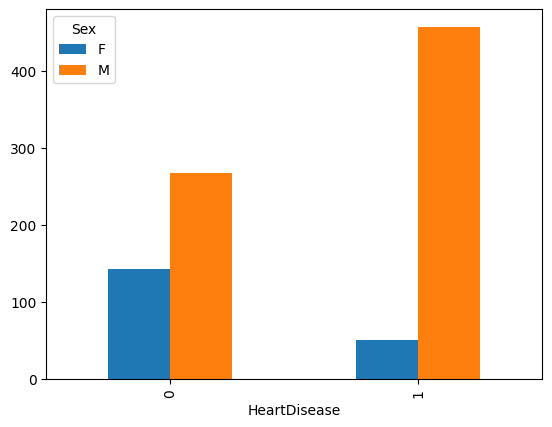

In [9]:
df.groupby(["HeartDisease", "Sex"]).size().unstack()
pd.crosstab(df["HeartDisease"], df["Sex"]).plot(kind='bar')

<Axes: xlabel='Sex'>

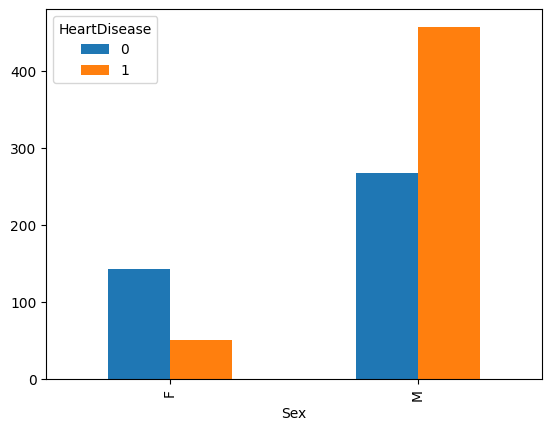

In [10]:
pd.crosstab(df["Sex"], df["HeartDisease"]).plot(kind='bar')

<Axes: xlabel='HeartDisease'>

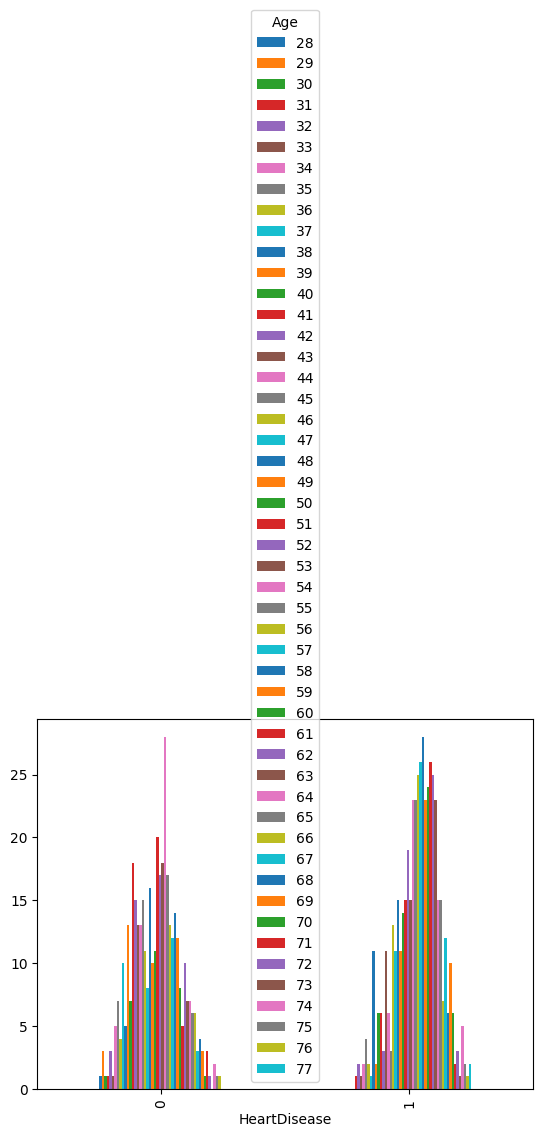

In [11]:
df.groupby(["Age", "HeartDisease"]).size().unstack()
pd.crosstab(df["HeartDisease"], df["Age"]).plot(kind='bar')

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
# using z-score to remove outliers of resting blood pressure

z_score = (df["RestingBP"] - df["RestingBP"].mean()) / df["RestingBP"].std()
z_score

0      0.414401
1      1.525527
2     -0.141163
3      0.303288
4      0.969964
         ...   
913   -1.252289
914    0.636626
915   -0.141163
916   -0.141163
917    0.303288
Name: RestingBP, Length: 917, dtype: float64

In [14]:
z_score.info()

<class 'pandas.core.series.Series'>
Index: 917 entries, 0 to 917
Series name: RestingBP
Non-Null Count  Dtype  
--------------  -----  
917 non-null    float64
dtypes: float64(1)
memory usage: 14.3 KB


In [15]:
z_score.describe()

count    9.170000e+02
mean     7.767929e-16
std      1.000000e+00
min     -2.918979e+00
25%     -6.967261e-01
50%     -1.411628e-01
75%      4.144005e-01
max      3.747780e+00
Name: RestingBP, dtype: float64

In [16]:
df["z_score"] = z_score

C:\Users\ratul\AppData\Local\Temp\ipykernel_21680\3551643389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["z_score"] = z_score


In [17]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,z_score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.414401
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.525527
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.141163
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.303288
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.969964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1.252289
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.636626
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.141163
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-0.141163


In [18]:
z_score.sample(10)

612   -0.585613
5     -0.696726
222   -0.696726
611    0.136619
141    0.414401
106   -0.696726
603    1.247746
407   -0.974508
116   -0.696726
516    0.969964
Name: RestingBP, dtype: float64

In [19]:
df = df[df["z_score"].abs() < 3]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,z_score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.414401
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.525527
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.141163
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.303288
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.969964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1.252289
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.636626
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.141163
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-0.141163


In [20]:
# using z-score to remove outliers of cholesterol
z_score = (df["Cholesterol"] - df["Cholesterol"].mean()) / df["Cholesterol"].std()
df["z_score"] = z_score
df = df[df["z_score"].abs() < 3]
df.shape

C:\Users\ratul\AppData\Local\Temp\ipykernel_21680\3939804471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["z_score"] = z_score


(907, 13)

In [21]:
df["FastingBS"].nunique()

2

In [22]:
np.unique(df["FastingBS"])

array([0, 1])

In [23]:
# using z-score to remove outliers of max heart rate
z_score = (df["MaxHR"] - df["MaxHR"].mean()) / df["MaxHR"].std()
df["z_score"] = z_score
df = df[df["z_score"].abs() < 3]
df.shape

C:\Users\ratul\AppData\Local\Temp\ipykernel_21680\1380667646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["z_score"] = z_score


(906, 13)

In [24]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,z_score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1.385705
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0.755693
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-1.528100
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-1.134343
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.583082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-0.189325
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.165057
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.858713
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1.464457


In [25]:
df = df.drop(columns=["z_score"])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [26]:
np.unique(df["ChestPainType"])

array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object)

In [27]:
# using one hot encoding to convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [28]:
# apply scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = df.copy()
df1[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]] = scaler.fit_transform(df1[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]])
df1 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.432687,0.460750,0.848846,-0.549294,1.389406,-0.831260,0,True,True,False,False,True,False,False,False,True
1,-0.477875,1.624344,-0.169349,-0.549294,0.756186,0.108380,1,False,False,True,False,True,False,False,True,False
2,-1.750958,-0.121047,0.792799,-0.549294,-1.539237,-0.831260,0,True,True,False,False,False,True,False,False,True
3,-0.583965,0.344390,0.148253,-0.549294,-1.143474,0.578200,1,False,False,False,False,True,False,True,True,False
4,0.052577,1.042547,-0.029230,-0.549294,-0.589407,-0.831260,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902236,-1.284641,0.615315,-0.549294,-0.193644,0.296308,1,True,False,False,True,True,False,False,True,False
914,1.537841,0.693469,-0.047912,1.820518,0.162542,2.363516,1,True,False,False,False,True,False,False,True,False
915,0.370848,-0.121047,-0.627069,-0.549294,-0.866440,0.296308,1,True,False,False,False,True,False,True,True,False
916,0.370848,-0.121047,0.353761,-0.549294,1.468559,-0.831260,1,False,True,False,False,False,False,False,True,False


In [29]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,9.060000e+02,9.060000e+02,9.060000e+02,9.060000e+02,9.060000e+02,9.060000e+02,906.000000
mean,-2.352791e-16,3.803678e-16,-1.254822e-16,-6.274108e-17,-2.744922e-16,-4.705581e-17,0.549669
std,1.000552e+00,1.000552e+00,1.000552e+00,1.000552e+00,1.000552e+00,1.000552e+00,0.497802
min,-2.705771e+00,-3.030032e+00,-1.850771e+00,-5.492942e-01,-2.924406e+00,-3.274324e+00,0.000000
25%,-6.900553e-01,-7.028441e-01,-2.230606e-01,-5.492942e-01,-6.685592e-01,-8.312599e-01,0.000000
50%,5.257676e-02,-1.210472e-01,2.276539e-01,-5.492942e-01,4.381345e-02,-3.144579e-01,1.000000
75%,6.891185e-01,4.607498e-01,6.339976e-01,-5.492942e-01,7.561861e-01,5.782001e-01,1.000000
max,2.492653e+00,3.078836e+00,2.987989e+00,1.820518e+00,2.576694e+00,4.994508e+00,1.000000


In [30]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,53.504415,132.080574,198.129139,0.231788,136.892936,0.884658,0.549669
std,9.431139,17.197620,107.111363,0.422207,25.281632,1.064825,0.497802
min,28.000000,80.000000,0.000000,0.000000,63.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.500000,0.000000,138.000000,0.550000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,185.000000,518.000000,1.000000,202.000000,6.200000,1.000000


In [31]:
# scaling using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = df.copy()
df2[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]] = scaler.fit_transform(df2[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]])
df2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.571429,0.557915,0.0,0.784173,0.295455,0,True,True,False,False,True,False,False,False,True
1,0.428571,0.761905,0.347490,0.0,0.669065,0.409091,1,False,False,True,False,True,False,False,True,False
2,0.183673,0.476190,0.546332,0.0,0.251799,0.295455,0,True,True,False,False,False,True,False,False,True
3,0.408163,0.552381,0.413127,0.0,0.323741,0.465909,1,False,False,False,False,True,False,True,True,False
4,0.530612,0.666667,0.376448,0.0,0.424460,0.295455,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.285714,0.509653,0.0,0.496403,0.431818,1,True,False,False,True,True,False,False,True,False
914,0.816327,0.609524,0.372587,1.0,0.561151,0.681818,1,True,False,False,False,True,False,False,True,False
915,0.591837,0.476190,0.252896,0.0,0.374101,0.431818,1,True,False,False,False,True,False,True,True,False
916,0.591837,0.476190,0.455598,0.0,0.798561,0.295455,1,False,True,False,False,False,False,False,True,False


In [32]:
df2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,0.520498,0.496005,0.382489,0.231788,0.531604,0.395984,0.549669
std,0.192472,0.163787,0.206779,0.422207,0.181882,0.121003,0.497802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.380952,0.336390,0.000000,0.410072,0.295455,0.000000
50%,0.530612,0.476190,0.429537,0.000000,0.539568,0.357955,1.000000
75%,0.653061,0.571429,0.513514,0.000000,0.669065,0.465909,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# now using grid search cv to find the best parameters for the model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

In [34]:
model_params = {
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [10, 50, 100],
            "max_features": ["auto", "sqrt"],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False]
        }
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf", "poly"],
            "gamma": ["scale", "auto"]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.1, 1, 10],
            "penalty": ["l1", "l2"],
            "solver": ["liblinear", "saga"]
        }
    },
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
        }
    },
    "GaussianNB": {
        "model": GaussianNB(),
        "params": {}
    },
    "KMeans": {
        "model": KMeans(),
        "params": {
            "n_clusters": range(2, 100, 5),
            "init": ["k-means++", "random"],
            "max_iter": [100, 200],
            "n_init": [10, 20]
        
        }
    }
}

In [35]:
# now applying gridsearch cv only on the training set 
x = df1.drop("HeartDisease", axis=1)
y = df1["HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(x_train, y_train) # using standard scaler scaled data
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })
scores_df_ss = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

In [37]:
# now applying gridsearch cv only on the training set 
x = df2.drop("HeartDisease", axis=1)
y = df2["HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(x_train, y_train) # using minmax scaler scaled data
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })
scores_df_mms = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

In [38]:
scores_df_ss

,model,best_score,best_params
0,RandomForestClassifier,0.871533,"{'bootstrap': True, 'max_depth': 20, 'max_feat..."
1,SVC,0.865996,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
2,LogisticRegression,0.856303,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}"
3,DecisionTreeClassifier,0.796973,"{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
4,KNeighborsClassifier,0.848027,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh..."
5,GaussianNB,0.852165,{}
6,KMeans,-374.765447,"{'init': 'random', 'max_iter': 100, 'n_cluster..."


In [39]:
scores_df_mms

,model,best_score,best_params
0,RandomForestClassifier,0.874358,"{'bootstrap': True, 'max_depth': None, 'max_fe..."
1,SVC,0.856379,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}"
2,LogisticRegression,0.859157,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}"
3,DecisionTreeClassifier,0.827366,"{'criterion': 'entropy', 'max_depth': 10, 'min..."
4,KNeighborsClassifier,0.850805,"{'algorithm': 'auto', 'n_neighbors': 7, 'weigh..."
5,GaussianNB,0.856389,{}
6,KMeans,-38.418972,"{'init': 'k-means++', 'max_iter': 200, 'n_clus..."


In [41]:
best_params_rf = scores_df_mms[scores_df_mms["model"] == "RandomForestClassifier"]["best_params"].iloc[0]
print(best_params_rf)

{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [42]:
# now use random forest classifier with the best parameters to predict the test set
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, n_estimators=50)
rft.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5, n_estimators=50)

In [43]:
rft.score(x_test, y_test)

0.8681318681318682

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(rft, x_test, y_test, cv=5).mean()

np.float64(0.8465465465465467)

In [45]:
cm = confusion_matrix(y_test, rft.predict(x_test))
cm

array([[67, 14],
       [10, 91]])

<Axes: >

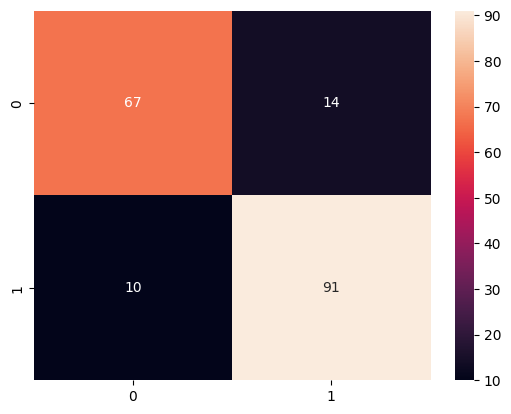

In [46]:
import seaborn as sn
sn.heatmap(cm, annot=True, fmt="d")

In [52]:
# now we will use pca to decrease the dimensionality of the data
# so we first scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.43268734,  0.46074981,  0.848846  , ..., -0.8232726 ,
        -0.99779493,  1.14251631],
       [-0.47787471,  1.62434375, -0.16934854, ..., -0.8232726 ,
         1.00220995, -0.87526103],
       [-1.75095822, -0.12104716,  0.79279859, ..., -0.8232726 ,
        -0.99779493,  1.14251631],
       ...,
       [ 0.37084763, -0.12104716, -0.62706901, ...,  1.2146645 ,
         1.00220995, -0.87526103],
       [ 0.37084763, -0.12104716,  0.35376058, ..., -0.8232726 ,
         1.00220995, -0.87526103],
       [-1.64486793,  0.34439041, -0.21605471, ..., -0.8232726 ,
        -0.99779493,  1.14251631]], shape=(906, 15))

In [54]:
from sklearn.decomposition import PCA
pca = PCA(0.95) # 95% of variance
x_pca = pca.fit_transform(x_scaled)
x_pca.shape

(906, 13)

In [59]:
pca.explained_variance_ratio_

array([0.22727431, 0.10971862, 0.09526005, 0.0819495 , 0.07518046,
       0.07094785, 0.06298508, 0.05452314, 0.05082468, 0.04349225,
       0.04057214, 0.03042665, 0.0284959 ])

In [60]:
pca.n_components_

np.int64(13)

In [63]:
x.keys().shape

(15,)

In [64]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)

In [65]:
# now use random forest classifier with the best parameters to predict the test set
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, n_estimators=50)
rft.fit(x_train_pca, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5, n_estimators=50)

In [67]:
accuracy = rft.score(x_test_pca, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8626373626373627


<Axes: >

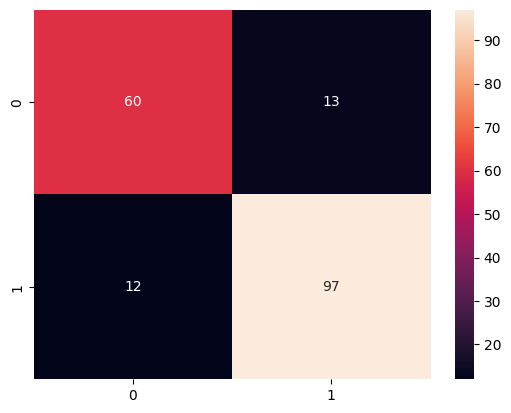

In [68]:
cm = confusion_matrix(y_test, rft.predict(x_test_pca))
sn.heatmap(cm, annot=True, fmt="d")

In [70]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [72]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 906, dtype: int64

In [76]:
pca_df = pd.DataFrame(data=x_pca, columns=[f"PC{i+1}" for i in range(x_pca.shape[1])])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.117432,-0.426462,0.652945,-1.305465,-0.038489,0.204059,0.624047,1.167857,-0.858904,0.016005,-0.204687,-0.065329,0.272025
1,0.214308,-1.081002,0.906506,2.371277,0.048714,0.430532,-1.669413,0.506809,-0.877072,-1.433277,-0.951632,-0.230655,-0.105549
2,1.627606,2.154424,0.334322,-1.935698,-1.505416,-0.443135,0.470953,-0.411737,-1.245611,0.096031,0.492404,-2.038025,0.395470
3,-1.221726,-1.681055,1.090213,-0.139048,-0.484483,0.161684,-1.181569,-0.855329,0.403965,-1.491805,0.637684,-0.391107,-0.116234
4,1.262373,-0.072027,-0.811807,1.642750,0.036944,1.709387,0.870417,-0.348381,-1.091069,-0.116410,0.032944,-0.649361,0.056839
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,-0.093292,-1.344941,0.430648,-0.053473,3.231149,-2.954356,0.360124,-1.531670,-0.652394,0.541158,0.182333,-1.080790,0.716015
902,-2.084854,-0.645322,-0.021611,0.015963,1.483216,0.836332,-0.467059,1.599814,1.167036,0.929295,-1.235171,-0.656667,-0.828599
903,-1.761507,-1.491904,-0.339554,-0.538724,-0.278769,0.137875,0.299154,-0.655720,-0.176734,-0.270341,-0.057487,0.412176,0.073905
904,1.103862,0.210803,1.740566,-0.616081,-0.373211,-0.662619,-2.562370,0.189375,-0.395783,0.548806,-1.123880,1.415209,0.157999


In [77]:
rft.predict([[3.117432,	-0.426462,	0.652945,	-1.305465,	-0.038489,	0.204059,	0.624047,	1.167857,	-0.858904,	0.016005,	-0.204687,	-0.065329,	0.272025]])

array([0])

In [78]:
rft.predict([[-1.221726,	-1.681055,	1.090213,	-0.139048,	-0.484483,	0.161684,	-1.181569,	-0.855329,	0.403965,	-1.491805,	0.637684,	-0.391107,	-0.116234]])

array([1])